In [13]:
using CSV
using PyPlot
const plt = PyPlot
using Conda
using PyCall
ccrs = pyimport("cartopy.crs")
datacrs = ccrs.PlateCarree();

## Data
Downloaded from https://www.vliz.be/en/imis?module=dataset&dasid=3117. 

> Vanermen N, Stienen EWM, Fijn R, Markones N, Holdsworth N, Osypchuk A, Pinto C, Desmet P (2022): European Seabirds at Sea (ESAS). ICES, Copenhagen, Denmark. https://esas.ices.dk. https://doi.org/10.14284/601

Two files are processed:
- `event.txt`: it gives the data set ID, the position and the date
- `occurrence.txt`: it gives the count for different taxa, and relate them to the eventID read from the previous fole. 

In [20]:
datadir = "/home/ctroupin/data/EMODnet/Biology/dwca-esas-v1.3"
datafileevent = joinpath(datadir, "event.txt")
datafileoccur = joinpath(datadir, "occurrence200.csv")
isfile(datafileevent) & isfile(datafileoccur)

true

In [6]:
function read_data_event(datafile::AbstractString)
    open(datafile, "r") do df
        firstline = readline(df)
        column_names = split(firstline, "\t")
        
        ncolumns = length(column_names)
        @info("Number of columns: $(ncolumns)")
        
        lon_column = findfirst(occursin.("decimalLongitude", column_names))
        lat_column = findfirst(occursin.("decimalLatitude", column_names))
        id_column = findfirst()
        @info("Column index for longitude: $(lon_column); for latitude: $(lat_column)")
        
        lon = Float64[]
        lat = Float64[]
       
        for lines in readlines(df)
            linesplit = split(lines, "\t")
            
            if linesplit[2] == "subSample"
                push!(lon, parse(Float64, linesplit[lon_column]))
                push!(lat, parse(Float64,linesplit[lat_column]))
            end
        end
        
        
        return lon::Array{Float64}, lat::Array{Float64}
    end
end

read_data_event (generic function with 1 method)

In [7]:
@time lon, lat = read_data_event(datafileevent);

[ Info: Number of columns: 15
[ Info: Column index for longitude: 13; for latitude: 12


  3.300820 seconds (8.68 M allocations: 2.588 GiB, 25.37% gc time, 12.95% compilation time)


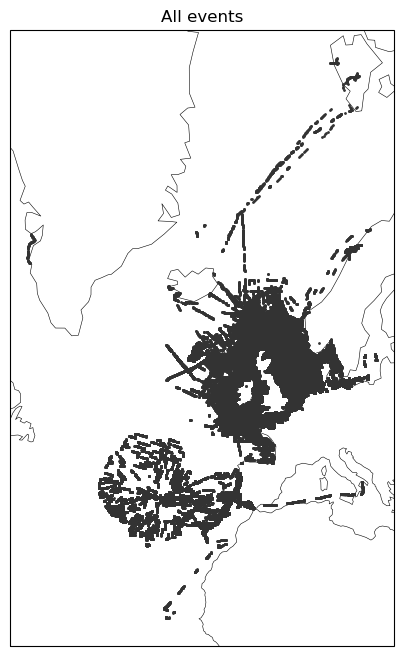

PyObject Text(0.5, 1.0, 'All events')

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=ccrs.Mercator())
ax.plot(lon, lat, "o", color=".2", ms=1, transform=datacrs)
ax.coastlines(lw=.4)
ax.set_title("All events")

In [47]:
function read_data_occurence(datafile::AbstractString)
    open(datafile, "r") do df
        firstline = readline(df)
        column_names = split(firstline, "\t")
        
        ncolumns = length(column_names)
        println(column_names)
        @info("Number of columns: $(ncolumns)")
        
        scientificName_column = findfirst(column_names .== "scientificName")
        eventID_column = findfirst(column_names .== "eventID")
        individualCount_column = findfirst(column_names .== "individualCount")

        individualCount = Int64[]
        scientificName = String[]
        eventID = String[]
       
        for lines in readlines(df)
            linesplit = split(lines, "\t")
            
            push!(scientificName, linesplit[scientificName_column])
            push!(eventID, linesplit[eventID_column])
            push!(individualCount, parse(Int64, linesplit[individualCount_column]))
        end
        
        
        return scientificName::Vector{String}, eventID::Vector{String}, individualCount
    end
end

read_data_occurence (generic function with 1 method)

In [48]:
@info("Reading data from $(datafileoccur)")
scientificName, eventID, count = read_data_occurence(datafileoccur);

[ Info: Reading data from /home/ctroupin/data/EMODnet/Biology/dwca-esas-v1.3/occurrence200.csv


SubString{String}["id", "basisOfRecord", "occurrenceID", "occurrenceRemarks", "individualCount", "sex", "lifeStage", "behavior", "occurrenceStatus", "associatedTaxa", "eventID", "scientificNameID", "scientificName", "kingdom", "vernacularName"]


[ Info: Number of columns: 15


In [36]:
scientificNameUnique = unique(scientificName)

22-element Vector{String}:
 "Larus argentatus"
 "Columba livia domestica"
 "Phalacrocorax carbo"
 "Larus fuscus"
 "Sterna sandvicensis"
 "Morus bassanus"
 "Larus marinus"
 "Larus ridibundus"
 "Larus canus"
 "Melanitta nigra"
 "Sterna hirundo / paradisaea"
 "Sterna hirundo"
 "Tadorna tadorna"
 "Fulmarus glacialis"
 "Rissa tridactyla"
 "Stercorarius skua"
 "Uria aalge"
 "Pluvialis apricaria"
 "Hydrobates pelagicus"
 "Puffinus puffinus"
 "Fratercula arctica"
 "Numenius arquata"

Find the event ID corresponding to a given species. 

In [40]:
myspecies = "Larus fuscus"
speciesindex = findall(scientificName .== myspecies)
@info("Found $(length(speciesindex)) events for $(myspecies)")
speciesevent = eventID[speciesindex]
# Get the corresponding events

[ Info: Found 24 events for Larus fuscus


24-element Vector{String}:
 "100000001_100000001_100000001"
 "100000001_100000001_100000001"
 "100000001_100000001_100000001"
 "100000001_100000001_100000002"
 "100000001_100000001_100000003"
 "100000001_100000001_100000003"
 "100000001_100000001_100000003"
 "100000001_100000001_100000004"
 "100000001_100000001_100000004"
 "100000001_100000001_100000005"
 "100000001_100000001_100000006"
 "100000001_100000001_100000008"
 "100000001_100000001_100000010"
 "100000001_100000001_100000020"
 "100000001_100000001_100000021"
 "100000001_100000001_100000021"
 "100000001_100000001_100000021"
 "100000001_100000001_100000021"
 "100000001_100000001_100000023"
 "100000012_100000012_100000012"
 "100000012_100000012_100000013"
 "100000012_100000012_100000015"
 "100000012_100000012_100000016"
 "100000012_100000012_100000016"

In [55]:
specieseventUnique = unique(speciesevent)
for ss in specieseventUnique
    eventindex = findall(speciesevent .== ss)
    totalcount = sum(count[eventindex])
end